# 4 - AutoEncoders

In [9]:
# %pip install kagglehub
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("zalando-research/fashionmnist")

# print("Path to dataset files:", path)

In [10]:
%pip install tensorflow



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 4 - 1 Normalization and Preprocessing

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import mnist

In [12]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

class Auto_Encoder:
    def __init__(self, encoder_layers, decoder_layers, latent_dimensions):
        # Build encoder
        self.encoder = tf.keras.Sequential()
        self.encoder.add(layers.Input(shape=(28, 28, 1)))
        self.encoder.add(layers.Flatten())
        
        for i in range(encoder_layers):
            self.encoder.add(layers.Dense(latent_dimensions * 2, activation='relu'))
        self.encoder.add(layers.Dense(latent_dimensions, activation='relu'))  # latent layer
        
        # Build decoder
        self.decoder = tf.keras.Sequential()
        for i in range(decoder_layers):
            self.decoder.add(layers.Dense(latent_dimensions * 2, activation='relu'))
        self.decoder.add(layers.Dense(28 * 28, activation='sigmoid'))
        self.decoder.add(layers.Reshape((28, 28, 1)))
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    def train(X_train, y_train, n_epochs, batch_size, optmizer, loss_fn):
        pass


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers, datasets


# Create AutoEncoder instance
autoencoder = Auto_Encoder(encoder_layers=1, decoder_layers=1, latent_dimensions=64)

# Define loss and optimizer
loss_fn = losses.MeanSquaredError()
optimizer = optimizers.AdamW(learning_rate=0.001)

# Training parameters
batch_size = 64
epochs = 10

train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1024).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test).batch(batch_size)

# --- Training Loop ---
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    epoch_loss = tf.metrics.Mean()

    for step, batch in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            reconstructed = autoencoder.forward(batch)
            loss = loss_fn(batch, reconstructed)

        grads = tape.gradient(loss, 
                              autoencoder.encoder.trainable_variables + 
                              autoencoder.decoder.trainable_variables)
        optimizer.apply_gradients(zip(grads, 
                                      autoencoder.encoder.trainable_variables + 
                                      autoencoder.decoder.trainable_variables))
        
        epoch_loss.update_state(loss)

    print(f"Training Loss: {epoch_loss.result().numpy():.5f}")




Epoch 1/10


KeyboardInterrupt: 

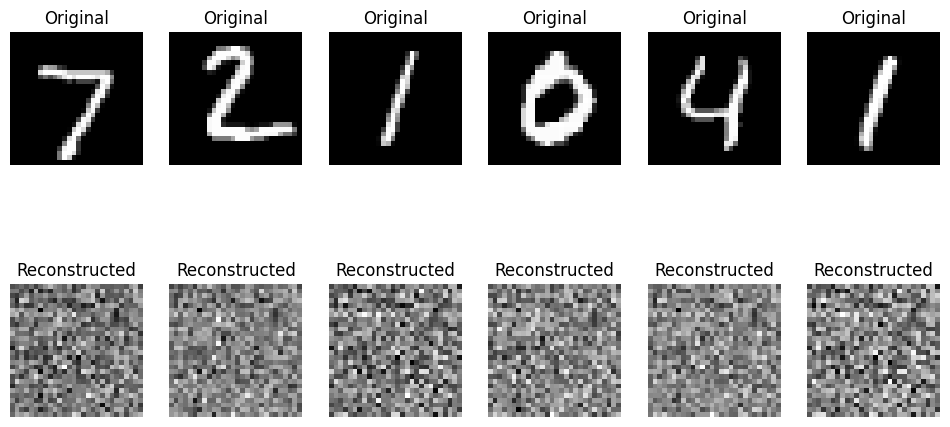

In [17]:
auto_encoder = Auto_Encoder(encoder_layers=3, decoder_layers=3, latent_dimensions=64)
encoded_imgs = auto_encoder.encoder(x_test).numpy()
decoded_imgs = auto_encoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()